In [1]:
%matplotlib notebook
%pylab

from scipy.integrate import quad
from scipy.special import erf

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
def Gf1(x,y):
    
    return (x-1)*y*exp(-100*(y-0.5)**2)

def Gf2(x,y):
    
    return x*(y-1)*exp(-100*(y-0.5)**2)

def wlf1(x):
    
    w = (x-1)*(-(1/40)*sqrt(pi)*erf(5-10*x)-(1/200)*exp(-25*(1-2*x)**2)) - \
    (x-1)*(-(1/40)*sqrt(pi)*erf(5)-(1/200)*exp(-25))
    
    return w

def wlf2(x):
    
    w = x*((1/40)*sqrt(pi)*erf(-5)-(1/200)*exp(-25))-x*((1/40)*sqrt(pi)*erf(5-10*x)-(1/200)*exp(-25*(1-2*x)**2)) 
    
    return w

<IPython.core.display.Javascript object>


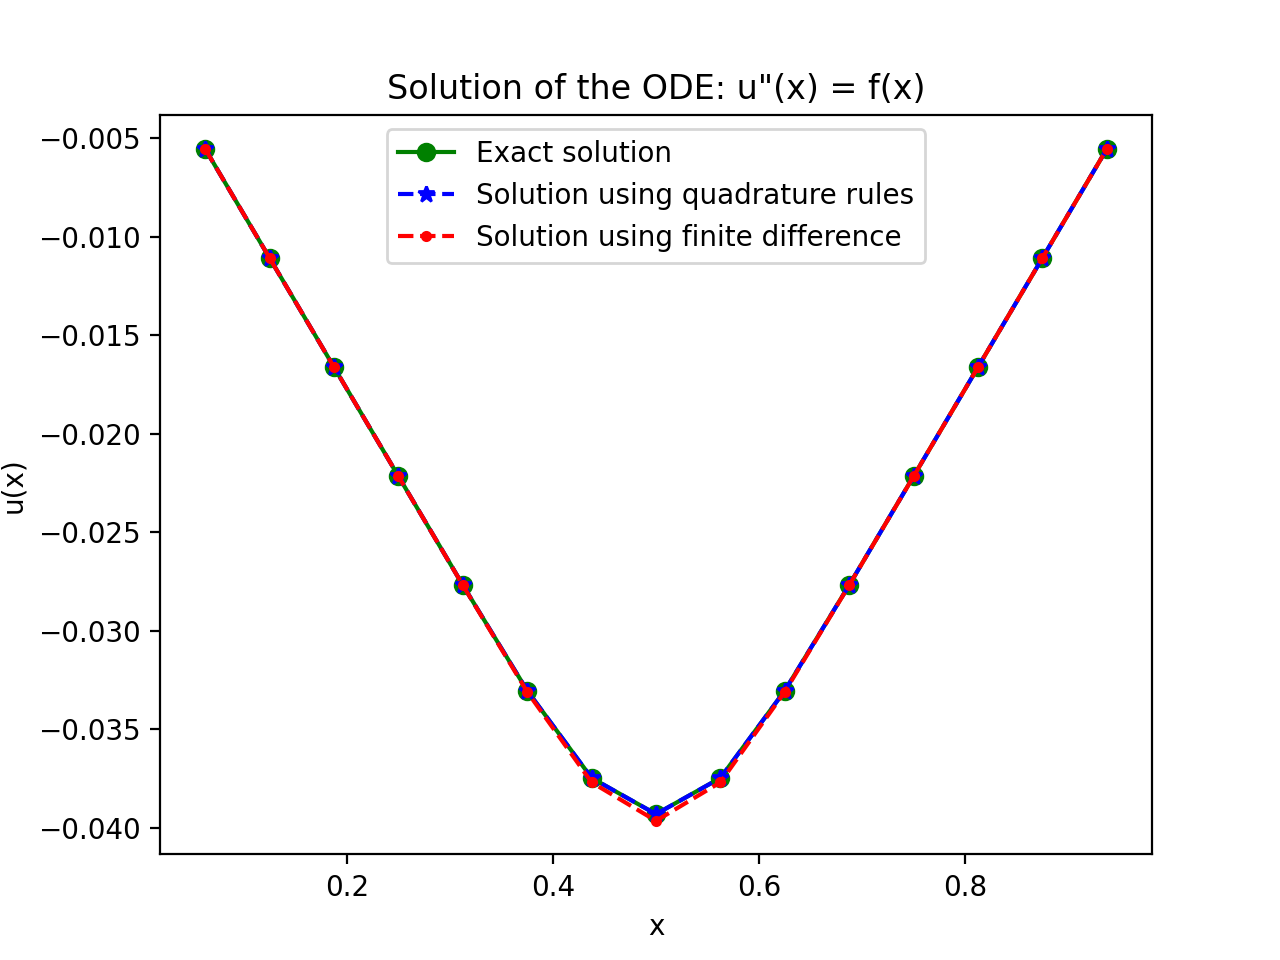

In [4]:
figure(1)
clf()

def rhs(x):
    return exp(-100*(x-0.5)**2)


N = 16
x = linspace(0,1,N+1)
I = zeros(N+1)
for i in range(len(x)):
    
    I1 = lambda y: Gf1(x[i],y)
    I2 = lambda y: Gf2(x[i], y)
    
    I[i] = quad(I1,0, x[i])[0] + quad(I2,x[i],1)[0]

exact = wlf1(x) + wlf2(x)

f = rhs(x[1:-1])
h = 1/N
# Construct A and compute inv(A)
z = ones(N-1)
A = (diag(z[:-1],-1) -2*diag(z) + diag(z[:-1],1))/h**2
Ainv = inv(A)

u = solve(A,f)

plot(x[1:-1],exact[1:-1],'go-', label = 'Exact solution')
plot(x[1:-1],I[1:-1],'b*--', label = 'Solution using quadrature rules')
plot(x[1:-1],u,'r.--', label = 'Solution using finite difference')

xlabel('x')
ylabel('u(x)')
title('Solution of the ODE: u"(x) = f(x)')
legend()
show()